<a href="https://colab.research.google.com/github/RojaCM/MACHINE-LEARNING-ROJA/blob/main/Tensorflow%20Implementation%20-%20ANN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import os

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.8.0'

In [30]:
tf.keras.__version__

'2.8.0'

In [31]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [33]:
checklist=['CPU','GPU']

for device in checklist:
  out=tf.config.list_logical_devices(device)
  if len(out)>0:
    print(f'{device} is available')
    print('details',out)
  else:
    print(f'{device} is not available')

CPU is available
details [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
GPU is available
details [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
mnist=tf.keras.datasets.mnist

In [36]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [37]:
x_train_full.shape

(60000, 28, 28)

In [38]:
y_train_full.shape

(60000,)

In [39]:
x_test.shape

(10000, 28, 28)

In [40]:
y_test.shape

(10000,)

In [41]:
x_train_full.dtype

dtype('uint8')

In [49]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = x_test / 255.

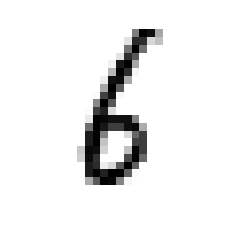

In [50]:
# lets view the random data point of X_train
plt.imshow(x_train[98],cmap='binary')
plt.axis('off')
plt.show()


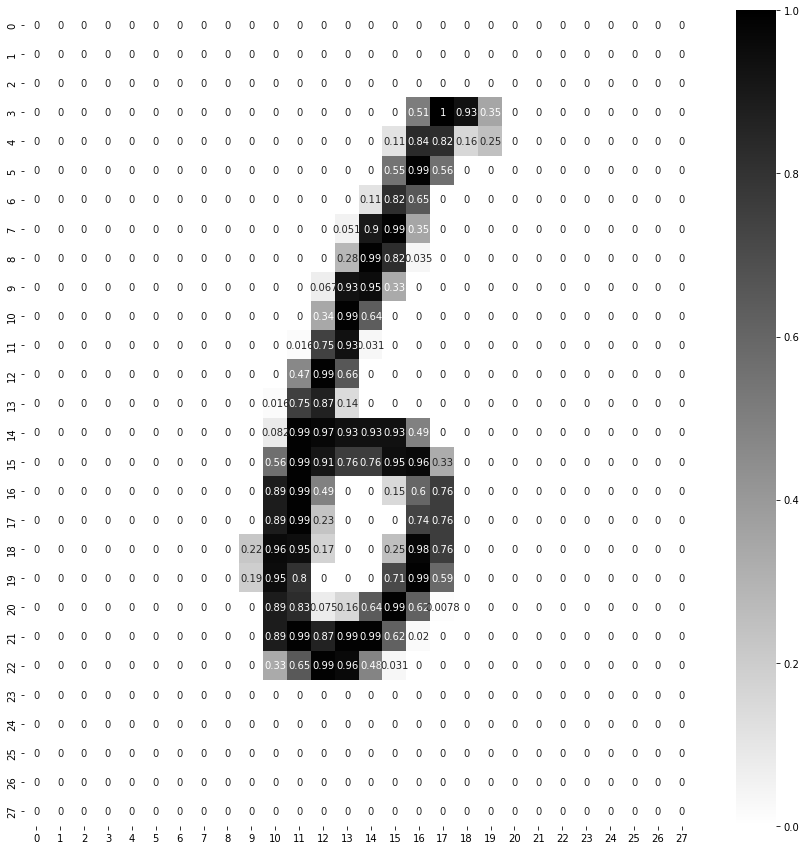

In [51]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(x_train[98],annot=True,cmap='binary')


In [52]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [56]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

In [57]:
model_clf=tf.keras.models.Sequential(LAYERS)

Altenative 1

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Alternative 2

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

For custom weights initialiser or setting weights

In [60]:
model_clf.layers

In [62]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [63]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [64]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [65]:
hidden1=model_clf.layers[1]

In [66]:
hidden1.name

'hiddenLayer1'

In [67]:
model_clf.get_layer(hidden1.name)is hidden1

True

In [69]:
hidden1.get_weights()

[array([[-0.06448387,  0.0075633 , -0.0598914 , ..., -0.05927061,
         -0.04737981, -0.05664199],
        [-0.02409281, -0.04940489, -0.04682985, ..., -0.00065552,
         -0.03466062,  0.0236285 ],
        [ 0.05450428,  0.02273675,  0.01879207, ...,  0.01713955,
         -0.00120417,  0.03349511],
        ...,
        [-0.02472616,  0.07334843, -0.05966381, ..., -0.04696269,
          0.06903003,  0.03866263],
        [ 0.0653256 ,  0.01566469,  0.00886033, ..., -0.02133309,
         -0.00861906, -0.05678046],
        [ 0.03674459,  0.00976627,  0.03900969, ...,  0.03450972,
          0.01507342,  0.02412442]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [71]:
weights,bias=hidden1.get_weights()

In [72]:
print('shape\n ',weights.shape)

shape
  (784, 300)


In [73]:
print('shape\n',bias.shape)

shape
 (300,)


In [75]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['Accuracy']

In [76]:
model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [77]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [78]:
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)

history=model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6067 - Accuracy: 0.8430 - val_loss: 0.3054 - val_Accuracy: 0.9178
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2847 - Accuracy: 0.9192 - val_loss: 0.2305 - val_Accuracy: 0.9354
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2325 - Accuracy: 0.9333 - val_loss: 0.1947 - val_Accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1990 - Accuracy: 0.9440 - val_loss: 0.1724 - val_Accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1748 - Accuracy: 0.9500 - val_loss: 0.1515 - val_Accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1555 - Accuracy: 0.9555 - val_loss: 0.1383 - val_Accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1395 - Accuracy: 0.9606 - val_loss: 0.1294 - val_Accuracy: